In [94]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import string

#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [95]:
import sqlite3
from pandas import DataFrame

class basis_data:
    def __init__(self, nama):
        self.nama = nama
        
    def open_connect(self):
        self.connection = sqlite3.connect(self.nama)
        
    def show_data(self):
        query = 'SELECT Kompascom FROM kompas'
        cursor = self.connection.cursor()
        cursor.execute(query)
        hasil = cursor.fetchall()
        cursor.close()
        return hasil
    
    def close_connect(self):
        self.connection.commit()
        self.connection.close()
    
database = 'tweet_berita.db'
data = basis_data(database)
data.open_connect()
hasil = data.show_data() 

In [96]:
hasil

[('Dalam draf sementara, Revisi UU Pemilu menyebut pilkada serentak mulai 2027. Namun, sejumlah partai tetap menginginkan tetap di 2024. https://t.co/kNQXTGmiNy',),
 ('"Sudah waktunya angka ini kita upayakan bersama untuk segera turun," kata Wiku https://t.co/TF8hK5Gabv',),
 ('Eiger adalah salah satu merek perlengkapan outdoor dalam negeri yang relatif terkenal. Meski demikian, sebenarnya tak cuma Eiger yang menjadi merek lokal perlengkapan outdoor yang terkenal. | #Lifestyle https://t.co/lKPvoUvS2V',),
 ('PSSI resmi menetapkan Kongres Tahunan PSSI 2021 yang akan diselenggarakan secara tatap muka pada 29 Mei 2021. https://t.co/NU0JAEJMaw',),
 ('Fabio Quartararo memutuskan menjadi pebalap usai melihat Rossi mengendarai motor YZR-M1 2004 dan sukses menjadi juara dunia MotoGP pada tahun itu. https://t.co/RkdBBTGBMD',),
 ('Penguasa pasar di Indonesia, yakni merek Jepang, justru terkesan belum berbicara banyak soal rencana masuk ke pasar motor listrik. https://t.co/JtJH8DwT4J',),
 ('Di teng

In [98]:
df = DataFrame (hasil,columns=['Isi Berita'])

df

,Isi Berita
0,"Dalam draf sementara, Revisi UU Pemilu menyebu..."
1,"""Sudah waktunya angka ini kita upayakan bersam..."
2,Eiger adalah salah satu merek perlengkapan out...
3,PSSI resmi menetapkan Kongres Tahunan PSSI 202...
4,Fabio Quartararo memutuskan menjadi pebalap us...
...,...
95,Paus Fransiskus akan bertemu dengan pemuka Syi...
96,Bukti bayar jalan tol beralih ke digital. http...
97,Polisi akan menyelidiki kasus temuan bangkai k...
98,"Dari hasil pemeriksaan yang dilakukan polisi, ..."


In [99]:
with pd.ExcelWriter('berita kompas.xlsx') as writer:  
        df.to_excel(writer, sheet_name='berita kompas')

In [100]:
def low(text):
        return text.lower()

def removenumber(text):
        return  re.sub(r"\d+", "", text)

def removepunct(text):
        return text.translate(str.maketrans("","",string.punctuation))

def removewhitespace(text):
        return text.strip()
    
def remove_url(text):
        return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b' , '', text, flags=re.MULTILINE)

def tokenizekalimat(text):
        return sent_tokenize(text)
    
def tokenizekata(text):
        return word_tokenize(text)
    
def remove_tweet_special(text):
        text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
        text = text.encode('ascii', 'replace').decode('ascii')
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
        
def remove_urlless(text):
        return text.replace("http://", " ").replace("https://", " ")             
        

def stopwords(kalimat):
    stop_words = set(stopwords.words('indonesian'))
    return ' '.join([w for w in kalimat if not w in stop_words])
    
def stemming(text):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        return stemmer.stem(text)


In [101]:
text = df['Isi Berita'].apply(low)
text = text.apply(remove_url)
text = text.apply(removenumber)
text = text.apply(removepunct)
text = text.apply(remove_tweet_special)
text = text.apply(remove_urlless)

text

0     dalam draf sementara revisi uu pemilu menyebut...
1     sudah waktunya angka ini kita upayakan bersama...
2     eiger adalah salah satu merek perlengkapan out...
3     pssi resmi menetapkan kongres tahunan pssi yan...
4     fabio quartararo memutuskan menjadi pebalap us...
                            ...                        
95    paus fransiskus akan bertemu dengan pemuka syi...
96             bukti bayar jalan tol beralih ke digital
97    polisi akan menyelidiki kasus temuan bangkai k...
98    dari hasil pemeriksaan yang dilakukan polisi s...
99    dpo kasus korupsi mubassir mengaku selama tahu...
Name: Isi Berita, Length: 100, dtype: object

In [102]:
def tokenizekata(text):
    return word_tokenize(text)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def stopwords(kalimat):
     return ' '.join([w for w in kalimat if not w in stop_words])

In [103]:
word_token = text.apply(tokenizekata)
list_kata = word_token.apply(stopwords)
text_ = list_kata.values 
text = ' '.join(text)

In [104]:
text

'dalam draf sementara revisi uu pemilu menyebut pilkada serentak mulai namun sejumlah partai tetap menginginkan tetap di sudah waktunya angka ini kita upayakan bersama untuk segera turun kata wiku eiger adalah salah satu merek perlengkapan outdoor dalam negeri yang relatif terkenal meski demikian sebenarnya tak cuma eiger yang menjadi merek lokal perlengkapan outdoor yang terkenal lifestyle pssi resmi menetapkan kongres tahunan pssi yang akan diselenggarakan secara tatap muka pada mei fabio quartararo memutuskan menjadi pebalap usai melihat rossi mengendarai motor yzrm dan sukses menjadi juara dunia motogp pada tahun itu penguasa pasar di indonesia yakni merek jepang justru terkesan belum berbicara banyak soal rencana masuk ke pasar motor listrik di tengah pandemi seperti ini masih ada motormotor lawas yang usianya sudah cukup tua tapi harganya tetap stabil habis masa tahap sosialisasi belum ditentukan sehingga tilang belum diberlakukan di ibu kota xiaomi menyampaikan permintaan maafny

In [116]:
# import word_tokenize & FreqDist from NLTK
import nltk
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

tokens = nltk.tokenize.word_tokenize(text)

print('Tokenizing Result : \n') 
print(tokens)
print('\n\n\n')

freq_tokens = nltk.FreqDist(tokens)

print('Frequency Tokens : \n') 
print(freq_tokens.most_common())

Tokenizing Result : 

['draf', 'revisi', 'uu', 'pemilu', 'menyebut', 'pilkada', 'serentak', 'partai', 'angka', 'upayakan', 'turun', 'wiku', 'eiger', 'salah', 'merek', 'perlengkapan', 'outdoor', 'negeri', 'relatif', 'terkenal', 'lokal', 'lifestyle', 'pssi', 'resmi', 'menetapkan', 'kongres', 'tahunan', 'diselenggarakan', 'tatap', 'muka', 'mei', 'fabio', 'quartararo', 'memutuskan', 'pebalap', 'rossi', 'mengendarai', 'motor', 'yzrm', 'sukses', 'juara', 'dunia', 'motogp', 'penguasa', 'pasar', 'indonesia', 'jepang', 'terkesan', 'berbicara', 'rencana', 'masuk', 'listrik', 'pandemi', 'motormotor', 'lawas', 'usianya', 'tua', 'harganya', 'stabil', 'habis', 'tahap', 'sosialisasi', 'ditentukan', 'tilang', 'diberlakukan', 'kota', 'xiaomi', 'permintaan', 'maafnya', 'pembeli', 'asli', 'poco', 'm', 'transaksinya', 'dibatalkan', 'flash', 'sale', 'januari', 'pubg', 'mobile', 'kunjung', 'dirilis', 'diblokir', 'india', 'pengembang', 'menelurkan', 'fearless', 'and', 'united', 'guards', 'gantinya', 'konsume

In [ ]:
freqtokens.plot(10,cumulative=False)
plt.show()

In [108]:

from nltk.corpus import stopwords

# tokenize text
freq_tokens

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]


print(tokens_without_stopword)

['draf', 'revisi', 'uu', 'pemilu', 'menyebut', 'pilkada', 'serentak', 'partai', 'angka', 'upayakan', 'turun', 'wiku', 'eiger', 'salah', 'merek', 'perlengkapan', 'outdoor', 'negeri', 'relatif', 'terkenal', 'lokal', 'lifestyle', 'pssi', 'resmi', 'menetapkan', 'kongres', 'tahunan', 'diselenggarakan', 'tatap', 'muka', 'mei', 'fabio', 'quartararo', 'memutuskan', 'pebalap', 'rossi', 'mengendarai', 'motor', 'yzrm', 'sukses', 'juara', 'dunia', 'motogp', 'penguasa', 'pasar', 'indonesia', 'jepang', 'terkesan', 'berbicara', 'rencana', 'masuk', 'listrik', 'pandemi', 'motormotor', 'lawas', 'usianya', 'tua', 'harganya', 'stabil', 'habis', 'tahap', 'sosialisasi', 'ditentukan', 'tilang', 'diberlakukan', 'kota', 'xiaomi', 'permintaan', 'maafnya', 'pembeli', 'asli', 'poco', 'm', 'transaksinya', 'dibatalkan', 'flash', 'sale', 'januari', 'pubg', 'mobile', 'kunjung', 'dirilis', 'diblokir', 'india', 'pengembang', 'menelurkan', 'fearless', 'and', 'united', 'guards', 'gantinya', 'konsumen', 'dipaksa', 'metode

In [110]:
text = ' '.join(tokens_without_stopword)

In [111]:
text

'draf revisi uu pemilu menyebut pilkada serentak partai angka upayakan turun wiku eiger salah merek perlengkapan outdoor negeri relatif terkenal lokal lifestyle pssi resmi menetapkan kongres tahunan diselenggarakan tatap muka mei fabio quartararo memutuskan pebalap rossi mengendarai motor yzrm sukses juara dunia motogp penguasa pasar indonesia jepang terkesan berbicara rencana masuk listrik pandemi motormotor lawas usianya tua harganya stabil habis tahap sosialisasi ditentukan tilang diberlakukan kota xiaomi permintaan maafnya pembeli asli poco m transaksinya dibatalkan flash sale januari pubg mobile kunjung dirilis diblokir india pengembang menelurkan fearless and united guards gantinya konsumen dipaksa metode bayar sistem lazada mengarahkan pembayaran cod otomatis penyakit jantung koroner disebabkan penumpukan timbunan plak dinding arteri kondisi feng shui mendekorasi rumah tujuan menciptakan memiliki energi positif mendekorasinya status whatsapp mengumumkan berkomitmen menjaga priva

In [114]:
# import package 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
print ('Wordcloud is installed and imported!')


Wordcloud is installed and imported!


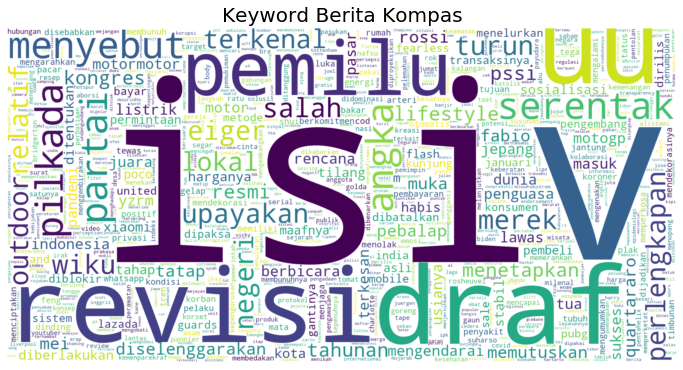

In [115]:
wc = WordCloud(width=1600, height=800, background_color="white", max_words=1000, stopwords=stop_words, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Keyword Berita Kompas', fontsize= 20)
plt.show()